In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# rating_final.csv
url = 'https://drive.google.com/file/d/1ptu4AlEXO4qQ8GytxKHoeuS1y4l_zWkC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
frame = pd.read_csv(path)

# 'geoplaces2.csv'
url = 'https://drive.google.com/file/d/1ee3ib7LqGsMUksY68SD9yBItRvTFELxo/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
geodata = pd.read_csv(path, encoding = 'CP1252') # change encoding to 'mbcs' in Windows

places =  geodata[['placeID', 'name']]

users_items = pd.pivot_table(data=frame, 
                                 values='rating', 
                                 index='userID', 
                                 columns='placeID')

users_items.fillna(0, inplace=True)

In [ ]:
users_items

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
U1135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train - Test split

#### 1st step: Let's find out all the ratings positions in this dataset different than 0

This will help us create the train and the test set (the `0` ratings cannot go to the test set, this is why we have to identify the non-zero ratings).

We will replace two random restaurants that user `U1001` has rated by zero. We will then predict the scores with our recommender:

In [ ]:
np.nonzero(np.array(users_items))

(array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   3,   3,   3,   3,   3,   3,   3,   3,   4,   4,
          4,   4,   4,   4,   4,   4,   5,   5,   5,   5,   5,   5,   5,
          5,   5,   5,   5,   6,   6,   6,   6,   6,   6,   6,   6,   7,
          7,   7,   7,   7,   7,   7,   7,   7,   8,   8,   8,   8,   8,
          8,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,  10,  10,
         10,  11,  11,  11,  11,  11,  12,  12,  12,  12,  12,  12,  12,
         12,  12,  12,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,
         14,  14,  14,  14,  14,  15,  15,  15,  15,  15,  15,  15,  15,
         15,  15,  15,  15,  15,  16,  16,  17,  17,  17,  17,  17,  17,
         17,  19,  19,  19,  19,  20,  20,  20,  21,  21,  21,  21,  21,
         21,  21,  21,  21,  21,  21,  22,  23,  23,  23,  23,  23,  23,
         23,  23,  23,  23,  23,  23,  23,  23,  23

In [ ]:
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(users_items)), # find out all the positions different than 0
).T
# ratings_pos.columns = ["row_pos", "column_pos"]

ratings_pos.head()

,0,1
0,0,31
1,0,32
2,0,75
3,0,81
4,0,85


How to interpret the `rating_pos` dataframe? The values at the position `[0, 31]`, `[0, 32]`, `[0, 75]`, `[0, 81]`... from the `users_items` dataframe are not zero. Those values in particular correspond to the first row (`userID = U1001`) of the dataframe, and to certain restaurants that this user has rated:

In [ ]:
users_items.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,2.0,1.0,2.0,1.0,1.0


In total, we have `907` non-zero values in the matrix. Those will be the "candidates" to become part of the test set.

In [ ]:
len(ratings_pos)

907

#### 2nd step: Create the train and test

In [ ]:
# split with train and test
from sklearn.model_selection import train_test_split
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)

These values will go to the train set:

In [ ]:
train_pos.sort_values([0,1]).head(3)

,0,1
0,0,31
1,0,32
2,0,75


...and these to the test set:

In [ ]:
test_pos.sort_values([0,1]).head(3)

,0,1
4,0,85
5,0,86
7,0,97


Now we have two dataframes called `train_pos` and `test_pos` which contain the rating positions in the `users-items` dataframe. The next step will be to create a train and a test with the information in those positions: 

In [ ]:
pd.DataFrame(np.zeros(users_items.shape))

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_pos.values

array([[ 12, 117],
       [112,  92],
       [  5, 117],
       ...,
       [ 57,  99],
       [ 55, 118],
       [ 80, 118]])

In [ ]:
# create an empty arrays full of 0, with the same shape as the users-items data
train = np.zeros(users_items.shape)

# fill the set with the ratings based on the train positions
for pos in train_pos.values: 
    index = pos[0]
    col = pos[1]
    train[index, col] = users_items.iloc[index, col]

# convert arrays to dataframe
train = pd.DataFrame(train, 
                     columns=users_items.columns, 
                     index=users_items.index)

train.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How many ratings from our user `U1001` fell into the train set?

In [ ]:
train.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,2.0,1.0,2.0,1.0,0.0


Now it is time for the test set. We will follow the same process

In [ ]:
test = np.zeros(users_items.shape)

for pos in test_pos.values: 
    index = pos[0]
    col = pos[1]
    test[index, col] = users_items.iloc[index, col]
    
test = pd.DataFrame(test, 
                    columns=users_items.columns, 
                    index=users_items.index)

How many ratings from our user `U1001` fell into the train set?

In [ ]:
test.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,0.0,0.0,0.0,0.0,1.0


We can build a compact dataframe to store the positions of all the places in the test set and their true rating:

In [ ]:
true_test_ratings = []

for row in test_pos.iterrows():
    true_test_ratings.append(users_items.iloc[int(row[1][0]), int(row[1][1])])

In [ ]:
test_pos = test_pos.assign(true_rating = true_test_ratings)

In [ ]:
test_pos.head()

,0,1,true_rating
646,97,80,2.0
384,57,103,2.0
553,86,24,1.0
643,97,42,1.0
498,78,60,1.0


#### 3rd step: build the similarity matrix for the train set

In [ ]:
# train the model
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
userID,,,,,,,,,,,,,,,,,,,,,
U1001,1.000000,0.257130,0.188353,0.00000,0.069171,0.146254,0.213201,0.0,0.120605,0.0,...,0.0,0.0,0.0,0.354787,0.0,0.099136,0.0,0.000000,0.167248,0.000000
U1002,0.257130,1.000000,0.266371,0.08528,0.097823,0.103418,0.075378,0.0,0.426401,0.0,...,0.0,0.0,0.0,0.418121,0.0,0.210300,0.0,0.322329,0.413919,0.355335
U1003,0.188353,0.266371,1.000000,0.00000,0.000000,0.378777,0.000000,0.0,0.374817,0.0,...,0.0,0.0,0.0,0.122513,0.0,0.462147,0.0,0.059028,0.476463,0.208232


#### 4th step: Predict rating for a single place of the test set

We will look at the restaurant `placeID=135039` and user `U1001` - the data value in position `[0, 85]`

We use only the ratings on the train set, and the similarity matrix computed only from the train set:

In [ ]:
results = (
    pd.DataFrame({
        'ratings': train.loc[:,135039], 
        'similarities' : train_similarity.loc["U1001",:].tolist()
    })
)
results.head()

,ratings,similarities
userID,,
U1001,0.0,1.000000
U1002,0.0,0.257130
U1003,0.0,0.188353
U1004,0.0,0.000000
U1005,0.0,0.069171


As always, we compute the weights from the similarities:

In [ ]:
results = results.assign(weights = results.similarities / (sum(results.similarities)-1))

In [ ]:
results.head(3)

,ratings,similarities,weights
userID,,,
U1001,0.0,1.000000,0.116493
U1002,0.0,0.257130,0.029954
U1003,0.0,0.188353,0.021942


Then we weight the rating that each user gave to that place with each user's weight:

In [ ]:
results = results.assign(weighted_ratings = results.ratings * results.weights)
results.head(3)

,ratings,similarities,weights,weighted_ratings
userID,,,,
U1001,0.0,1.000000,0.116493,0.0
U1002,0.0,0.257130,0.029954,0.0
U1003,0.0,0.188353,0.021942,0.0


And get the predicted rating for user 1 for the place `135039` by adding up all the weighted ratings:

In [ ]:
pred_rating = results.weighted_ratings.sum()
pred_rating

0.17360625035091493

Real rating for user 1 for the place `135039`:

In [ ]:
true_rating = users_items.loc["U1001", 135039]
true_rating

1.0

We can compute the error as the true rating minus the predicted rating:

In [ ]:
error = true_rating - pred_rating
error

0.8263937496490851

Now we just need to do that for all of the places in the test set, and compute the performance metrics.

## Computing all recommendations for the test set

We will build a function that computes the ratings for a single user and a single movie

In [ ]:
def recommender(index_pos, column_pos): 
    # build a df with the ratings for one place (column_name) and
    # the similarities to one user (index_name)
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:].tolist()
      })
    )
    
    # compute the weights
    results = results.assign(weights = results.similarities / (sum(results.similarities) -1))
    
    # compute the weighted ratings
    results = results.assign(weighted_ratings = results.ratings * results.weights)
    
    # return rating prediction for one user and one movie
    return results.weighted_ratings.sum()

In [ ]:
recommender(0, 85)

0.17360625035091493

In [ ]:
test_pos.sort_values([0, 1])

,0,1,true_rating
4,0,85,1.0
5,0,86,1.0
7,0,97,1.0
35,3,106,2.0
41,4,96,1.0
...,...,...,...
835,125,100,1.0
836,125,102,2.0
853,131,80,1.0
855,131,97,1.0


Let's store the recommendations on a list:

In [ ]:
recs_test = []

for row in test_pos.iterrows():
    recs_test.append(
        recommender(
            index_pos = int(row[1][0]), 
            column_pos = int(row[1][1])
        )
    )

In [ ]:
recs_test

[0.3400539715957499,
 0.21121904839029512,
 0.15095985340385748,
 0.3787783745831341,
 0.12745662532751287,
 0.0,
 0.8343007563825918,
 0.7313123645772428,
 0.6141444412177671,
 0.020808614111823238,
 0.4089890119812526,
 0.2496028548515082,
 0.3667170750531232,
 0.3496022061284374,
 0.20493691971519568,
 0.28164625890609146,
 0.3359695613413084,
 0.09260794408361242,
 0.661305962955822,
 0.14805632040113975,
 0.15371994081538506,
 0.5766159100432958,
 0.31236909110852845,
 0.5226253695066889,
 0.36879529333705396,
 0.0,
 0.0,
 0.28861427268866496,
 0.242374485246199,
 0.3765446995756903,
 0.3149891925983004,
 0.6136248872355373,
 0.18602747209890638,
 0.21903401803422923,
 0.422837683285829,
 0.3889175940784153,
 0.47803043707349907,
 0.048615872366982206,
 0.4520918641601295,
 0.13637056843375847,
 0.08633576842101967,
 0.1741554334370587,
 0.074271312765842,
 0.2656865884561754,
 0.23582845781094006,
 0.040832945497802975,
 0.19169872600762689,
 0.2827185284073973,
 0.07675737318365

And we assign the list as a column of the `test_pos` dataframe:

In [ ]:
test_pos = test_pos.assign(pred_rating = recs_test)

In [ ]:
test_pos.head()

,0,1,true_rating,pred_rating
646,97,80,2.0,0.340054
384,57,103,2.0,0.211219
553,86,24,1.0,0.150960
643,97,42,1.0,0.378778
498,78,60,1.0,0.127457


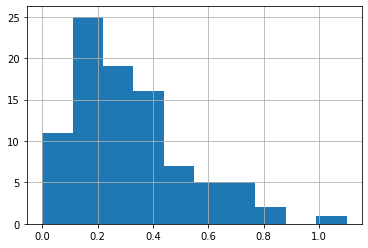

In [ ]:
test_pos.pred_rating.hist();

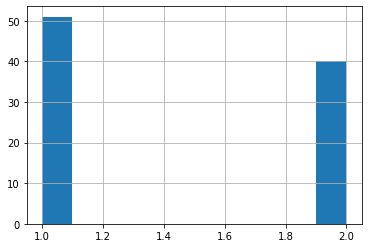

In [ ]:
test_pos.true_rating.hist();

## Performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

1.1258641792203279

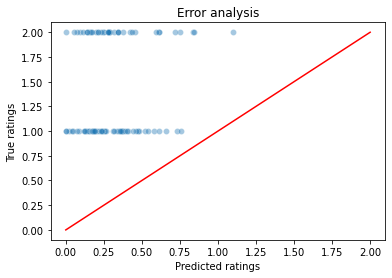

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = test_pos.pred_rating
true_values = test_pos.true_rating

plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')
sns.lineplot(x=[0,2], y=[0,2], color='red')
sns.scatterplot(x=predictions, y=true_values, alpha=0.4)
plt.show()

We know that our model won't be capable of exact predictions, but this doesn't matter for predictions. What we need is to be able to rank items from most likely to be enjoyed to least. So let's have a quick look to see if overall the predicted values for true values of 2 are higher than the predicted values for true values of one

Average predicted score for the true rating of 2

In [ ]:
test_pos.loc[test_pos.true_rating==2,:]["pred_rating"].mean()

0.34185354397750806

Average predicted score for the true rating of 1

In [ ]:
test_pos.loc[test_pos.true_rating==1,:]["pred_rating"].mean()

0.2916121163107809

We can see above that overall, our recommender persorms reasonably well at finding the correct order

If we were trying to predict the true ratings with our recommender, we could use a variety of metrics, one of which is the R2 score

[R2 regression score function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2%20score#sklearn.metrics.r2_score)

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [ ]:
from sklearn.metrics import r2_score

r2_score(test_pos.true_rating, test_pos.pred_rating)

-5.229145268690503

## Challenge:

Evaluate whether a recommender system using the sum of `rating + food_rating + service_rating` instead of only the `rating` is better?

In [ ]:
frame.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
# your code here